In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import scipy.stats as stats

In [3]:
df = pd.read_csv('Profile_of_Workplace_Safety_and_Health_in_the_United_States.csv')

https://opendata.socrata.com/Government/Profile-of-Workplace-Safety-and-Health-in-the-Unit/tcp4-eymc

In [4]:
df.head()

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
0,"South Carolina\n(33.99882060100049, -81.045367...",63,3.5,25.0,"36,200",3.0,492,49.0,24.0,111.0,State
1,"West Virginia\n(38.665511497000466, -80.712639...",49,6.9,46.0,"19,800",4.1,"1,798",27.0,7.0,173.0,Federal
2,"Massachusetts\n(42.27687306500047, -72.0826898...",44,1.4,1.0,"69,700",3.1,"1,929",21.0,33.0,123.0,Federal
3,"Tennessee\n(35.680943063000484, -85.7744864219...",101,3.8,30.0,"65,100",3.5,727,45.0,30.0,82.0,State
4,"Oklahoma\n(35.472034350000456, -97.52106845499...",97,6.1,42.0,"39,000",3.6,"1,872",24.0,19.0,131.0,Federal


In [5]:
df.shape

(54, 11)

In [6]:
df.dtypes

State                                    object
Number of Fatalities, 2012               object
Rate of Fatalities, 2012                float64
State Rank, Fatalities 2012             float64
Number of Injuries/Illnesses 2012        object
Injuries/Illnesses 2012 Rate            float64
Penalties FY 2013 (Average $)            object
Penalties FY 2013 (Rank)                float64
Inspectors                              float64
Years to Inspect Each Workplace Once    float64
State or Federal Program                 object
dtype: object

In [7]:
# Convert numeric columns that are objects to floats
df_clean = df.copy()

cols_to_convert = ["Number of Injuries/Illnesses 2012",
                  "Penalties FY 2013 (Average $)",
                  "Number of Fatalities, 2012"]

for col in cols_to_convert:
    df_clean[col] = df[col].str.replace(",","").astype(float)

In [8]:
df_clean.dtypes

State                                    object
Number of Fatalities, 2012              float64
Rate of Fatalities, 2012                float64
State Rank, Fatalities 2012             float64
Number of Injuries/Illnesses 2012       float64
Injuries/Illnesses 2012 Rate            float64
Penalties FY 2013 (Average $)           float64
Penalties FY 2013 (Rank)                float64
Inspectors                              float64
Years to Inspect Each Workplace Once    float64
State or Federal Program                 object
dtype: object

In [9]:
# Check for Null entries
df[df.isnull().any(axis=1)]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
11,"Florida\n(28.932042899000464, -81.92895558499964)",218,2.7,15.0,NaN,NaN,"1,821",25.0,60.0,238.0,Federal
17,"New Hampshire\n(43.6559537330005, -71.50035726...",14,2.2,4.0,NaN,NaN,"2,243",8.0,7.0,119.0,Federal
20,"South Dakota\n(44.35313342000046, -100.3735281...",31,6.7,45.0,NaN,NaN,"2,346",7.0,NaN,521.0,Federal
33,"Colorado\n(38.84384047000049, -106.13360888799...",82,3.5,25.0,NaN,NaN,"1,649",31.0,28.0,122.0,Federal
38,"Idaho\n(43.682630058000484, -114.3637261449997)",19,2.7,15.0,NaN,NaN,"1,449",33.0,9.0,108.0,Federal
41,"Mississippi\n(32.74551123200047, -89.538027644...",63,5.5,40.0,NaN,NaN,"1,515",32.0,14.0,112.0,Federal
44,"Rhode Island\n(41.70828281900049, -71.52246918...",8,1.7,2.0,NaN,NaN,"2,023",16.0,7.0,103.0,Federal
47,"North Dakota\n(47.47531738700047, -100.1184259...",65,17.7,50.0,NaN,NaN,"3,045",3.0,8.0,111.0,Federal
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# The number of records is small so replace missing values 
# with Mean for the column
df_clean = df_clean.fillna(df_clean.mean())

In [11]:
# Check again for Null entries
df_clean[df_clean.isnull().any(axis=1)]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
50,NaN,181.27451,4.3,25.1,64178.571429,3.62093,1727.88,25.5,38.979592,123.88,NaN
51,NaN,181.27451,4.3,25.1,64178.571429,3.62093,1727.88,25.5,38.979592,123.88,NaN
52,NaN,181.27451,4.3,25.1,64178.571429,3.62093,1727.88,25.5,38.979592,123.88,NaN
53,"Total or National, Average\n",4628.00000,3.4,25.1,64178.571429,3.40000,1727.88,25.5,38.979592,123.88,NaN


In [12]:
df_clean['State'][:3]

0    South Carolina\n(33.99882060100049, -81.045367...
1    West Virginia\n(38.665511497000466, -80.712639...
2    Massachusetts\n(42.27687306500047, -72.0826898...
Name: State, dtype: object

In [13]:
# State column has more information than needed; 
# remove the extra information
df_clean['State'] = df['State'].str.split('\n').str[0]

In [14]:
df_clean['State'][:3]

0    South Carolina
1     West Virginia
2     Massachusetts
Name: State, dtype: object

In [15]:
# There are extra entries at the end of the data set
df_clean['State'][-6:]

48                         Texas
49                    California
50                           NaN
51                           NaN
52                           NaN
53    Total or National, Average
Name: State, dtype: object

In [16]:
df_clean = df_clean[df_clean.State.str.contains("Total") == False]
df_clean['State'][-6:]

44    Rhode Island
45          Alaska
46      New Jersey
47    North Dakota
48           Texas
49      California
Name: State, dtype: object

In [17]:
df_clean.describe()

,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,92.340000,4.318000,25.100000,64178.571429,3.625349,1727.880000,25.50000,38.979592,123.880000
std,92.019876,2.788584,14.733344,56633.629354,0.656543,963.377702,14.57738,38.198456,73.311647
min,8.000000,1.400000,1.000000,6500.000000,2.300000,363.000000,1.00000,5.000000,31.000000
25%,39.000000,2.600000,12.000000,31050.000000,3.200000,996.500000,13.25000,9.500000,85.000000
50%,68.500000,3.500000,25.000000,62239.285714,3.620930,1812.000000,25.50000,27.000000,111.500000
75%,110.750000,5.125000,37.750000,72100.000000,3.900000,2120.500000,37.75000,52.000000,134.000000
max,536.000000,17.700000,50.000000,345400.000000,5.600000,6422.000000,50.00000,216.000000,521.000000


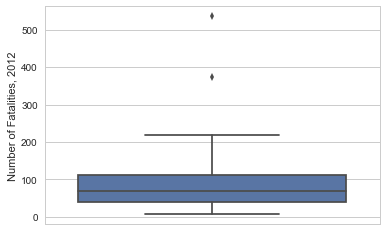

In [54]:
ax = sns.boxplot(y="Number of Fatalities, 2012", data=df_clean)

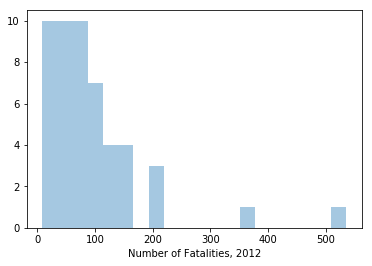

In [19]:
ax = sns.distplot(df_clean['Number of Fatalities, 2012'], kde=False, bins=20)

In [56]:
df_clean.sort_values(by='Number of Fatalities, 2012', ascending=False)[:2]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
48,Texas,536.0,4.8,35.0,203200.0,2.7,2187.0,10.0,98.0,136.0,Federal
49,California,375.0,2.3,6.0,345400.0,3.5,6422.0,1.0,216.0,179.0,State


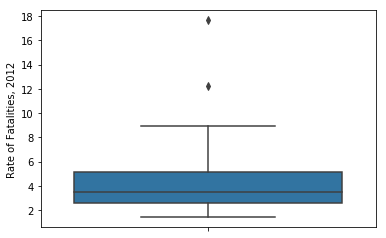

In [20]:
ax = sns.boxplot(y='Rate of Fatalities, 2012', data=df_clean)

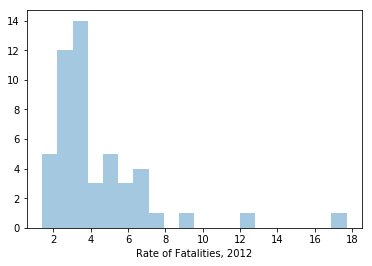

In [21]:
ax = sns.distplot(df_clean['Rate of Fatalities, 2012'], kde=False, bins=20)

In [57]:
df_clean.sort_values(by='Rate of Fatalities, 2012', ascending=False)[:2]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
47,North Dakota,65.0,17.7,50.0,64178.571429,3.62093,3045.0,3.0,8.0,111.0,Federal
35,Wyoming,35.0,12.2,49.0,6500.000000,3.50000,1777.0,28.0,9.0,101.0,State


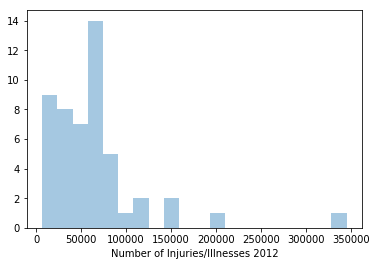

In [22]:
ax = sns.distplot(df_clean['Number of Injuries/Illnesses 2012'], kde=False, bins=20)

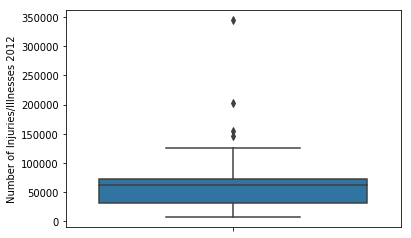

In [23]:
ax = sns.boxplot(y='Number of Injuries/Illnesses 2012', data=df_clean)

In [59]:
df_clean.sort_values(by='Number of Injuries/Illnesses 2012', ascending=False)[:4]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
49,California,375.0,2.3,6.0,345400.0,3.5,6422.0,1.0,216.0,179.0,State
48,Texas,536.0,4.8,35.0,203200.0,2.7,2187.0,10.0,98.0,136.0,Federal
19,Pennsylvania,194.0,3.4,22.0,155300.0,3.9,1916.0,22.0,57.0,125.0,Federal
21,New York,202.0,2.4,8.0,146300.0,2.5,2016.0,17.0,105.0,184.0,Federal


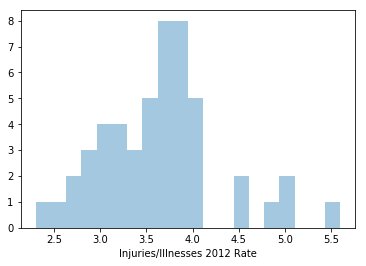

In [24]:
ax = sns.distplot(df_clean['Injuries/Illnesses 2012 Rate'], kde=False, bins=20)

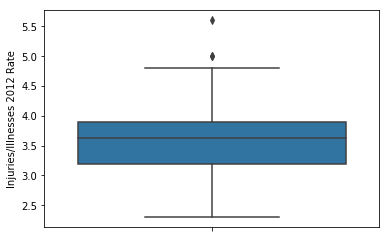

In [25]:
ax = sns.boxplot(y='Injuries/Illnesses 2012 Rate', data=df_clean)

In [60]:
df_clean.sort_values(by='Injuries/Illnesses 2012 Rate', ascending=False)[:2]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
23,Maine,19.0,3.2,20.0,21200.0,5.6,2083.0,14.0,8.0,80.0,Federal
25,Vermont,11.0,3.5,25.0,9900.0,5.0,1008.0,36.0,9.0,68.0,State


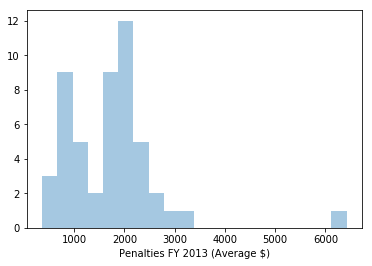

In [26]:
ax = sns.distplot(df_clean['Penalties FY 2013 (Average $)'], kde=False, bins=20)

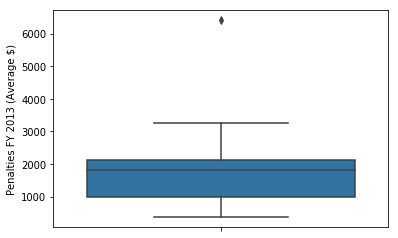

In [27]:
ax = sns.boxplot(y='Penalties FY 2013 (Average $)', data=df_clean)

In [61]:
df_clean.sort_values(by='Penalties FY 2013 (Average $)', ascending=False)[:1]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
49,California,375.0,2.3,6.0,345400.0,3.5,6422.0,1.0,216.0,179.0,State


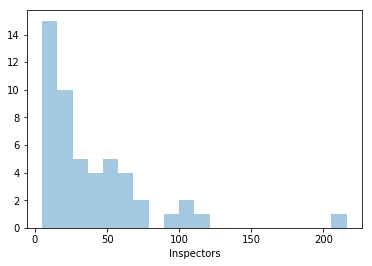

In [28]:
ax = sns.distplot(df_clean['Inspectors'], kde=False, bins=20)

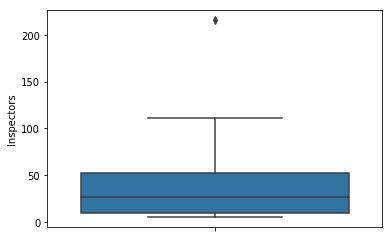

In [29]:
ax = sns.boxplot(y='Inspectors', data=df_clean)

In [62]:
df_clean.sort_values(by='Inspectors', ascending=False)[:1]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
49,California,375.0,2.3,6.0,345400.0,3.5,6422.0,1.0,216.0,179.0,State


In [30]:
# remove categorical data
df_cont = df_clean.drop('State',1)
df_cont = df_cont.drop('Penalties FY 2013 (Rank)',1)
df_cont = df_cont.drop('State Rank, Fatalities 2012',1) 
df_cont = df_cont.drop('State or Federal Program',1)

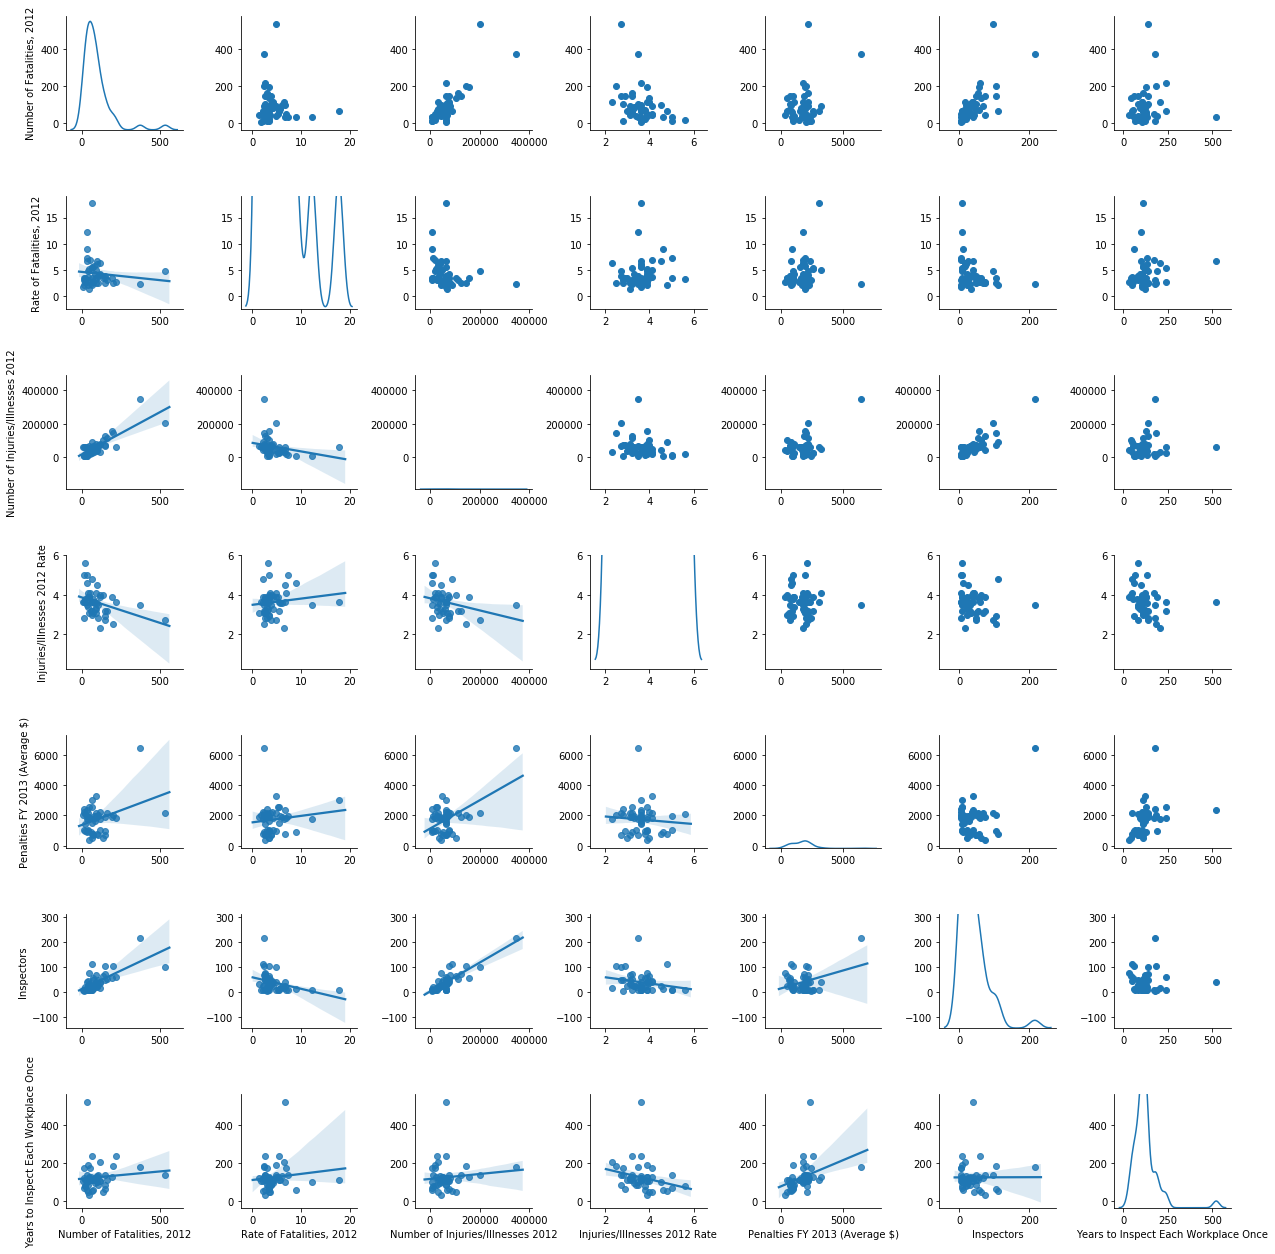

In [31]:
### WHY ARE KDE PLOTS OFF THE GRID?
g = sns.PairGrid(df_cont)
# Scatterplot.
g.map_upper(plt.scatter)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot)
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot)
plt.show()


In [32]:
# correlation

# Make the correlation matrix.
corrmat = df_cont.corr()
print(corrmat)

                                      Number of Fatalities, 2012  \
Number of Fatalities, 2012                              1.000000   
Rate of Fatalities, 2012                               -0.103638   
Number of Injuries/Illnesses 2012                       0.812810   
Injuries/Illnesses 2012 Rate                           -0.359071   
Penalties FY 2013 (Average $)                           0.366846   
Inspectors                                              0.709983   
Years to Inspect Each Workplace Once                    0.095607   

                                      Rate of Fatalities, 2012  \
Number of Fatalities, 2012                           -0.103638   
Rate of Fatalities, 2012                              1.000000   
Number of Injuries/Illnesses 2012                    -0.250741   
Injuries/Illnesses 2012 Rate                          0.133885   
Penalties FY 2013 (Average $)                         0.124127   
Inspectors                                           -0.337

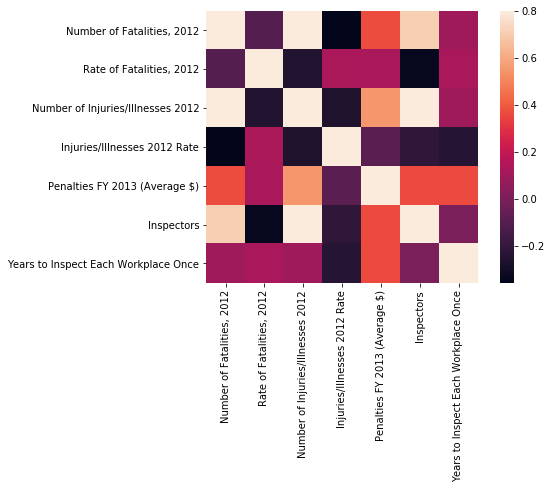

In [33]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(8, 5))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

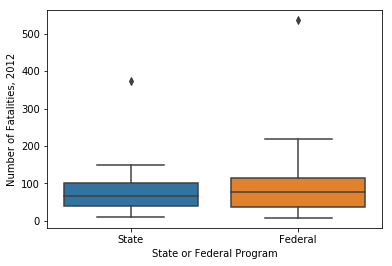

In [34]:
ax = sns.boxplot(x="State or Federal Program", y="Number of Fatalities, 2012", data=df_clean)

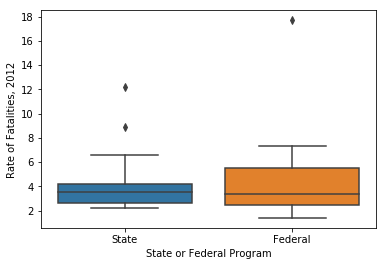

In [35]:
ax = sns.boxplot(x="State or Federal Program", y="Rate of Fatalities, 2012", data=df_clean)

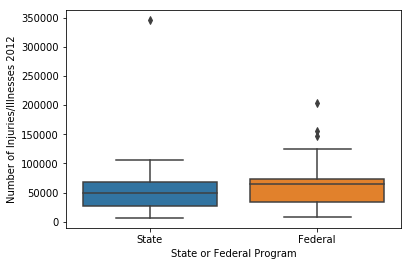

In [36]:
ax = sns.boxplot(x="State or Federal Program", y="Number of Injuries/Illnesses 2012", data=df_clean)

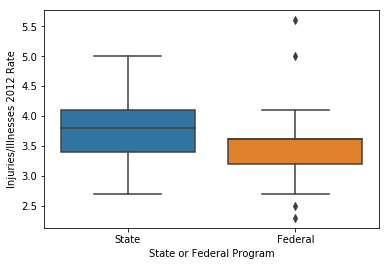

In [37]:
ax = sns.boxplot(x="State or Federal Program", y="Injuries/Illnesses 2012 Rate", data=df_clean)

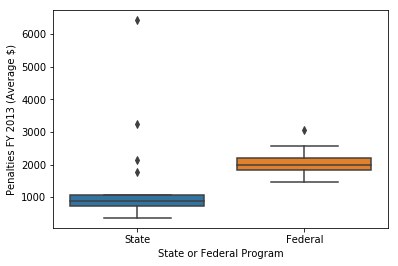

In [38]:
ax = sns.boxplot(x="State or Federal Program", y="Penalties FY 2013 (Average $)", data=df_clean)

In [68]:
df_clean[df_clean['State or Federal Program'] == 'State'].sort_values(by='Penalties FY 2013 (Average $)', ascending=False)[:4]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
49,California,375.0,2.3,6.0,345400.0,3.5,6422.0,1.0,216.0,179.0,State
28,Kentucky,91.0,4.9,37.0,48900.0,4.1,3254.0,2.0,39.0,124.0,State
27,Nevada,42.0,3.6,29.0,32400.0,4.1,2133.0,13.0,44.0,49.0,State
35,Wyoming,35.0,12.2,49.0,6500.0,3.5,1777.0,28.0,9.0,101.0,State


In [70]:
df_clean[df_clean['State or Federal Program'] == 'Federal'].sort_values(by='Penalties FY 2013 (Average $)', ascending=False)[:1]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
47,North Dakota,65.0,17.7,50.0,64178.571429,3.62093,3045.0,3.0,8.0,111.0,Federal


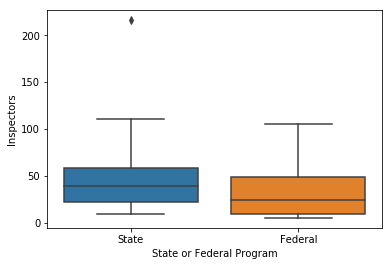

In [39]:
ax = sns.boxplot(x="State or Federal Program", y="Inspectors", data=df_clean)

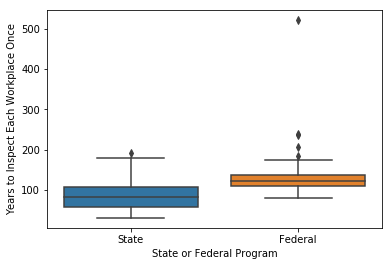

In [40]:
ax = sns.boxplot(x="State or Federal Program", y="Years to Inspect Each Workplace Once", data=df_clean)

In [64]:
df_clean[df_clean['State or Federal Program'] == 'State'].sort_values(by='Years to Inspect Each Workplace Once', ascending=False)[:1]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
18,New Mexico,39.0,4.8,35.0,19900.0,3.9,998.0,37.0,9.0,191.0,State


In [66]:
df_clean[df_clean['State or Federal Program'] == 'Federal'].sort_values(by='Years to Inspect Each Workplace Once', ascending=False)[:4]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
20,South Dakota,31.0,6.7,45.0,64178.571429,3.62093,2346.0,7.0,38.979592,521.0,Federal
11,Florida,218.0,2.7,15.0,64178.571429,3.62093,1821.0,25.0,60.000000,238.0,Federal
26,Arkansas,63.0,5.4,39.0,26600.000000,3.20000,2569.0,4.0,9.000000,237.0,Federal
42,Louisiana,116.0,6.4,43.0,30600.000000,2.30000,1765.0,29.0,16.000000,206.0,Federal


In [41]:
for col in df_cont.loc[:].columns:
    print(col)
    print(stats.ttest_ind(
        df_clean[df_clean['State or Federal Program'] == 'State'][col],
        df_clean[df_clean['State or Federal Program'] == 'Federal'][col]
    ))

Number of Fatalities, 2012
Ttest_indResult(statistic=-0.42034015452199763, pvalue=0.67611282570844533)
Rate of Fatalities, 2012
Ttest_indResult(statistic=-0.30314838662167748, pvalue=0.76308680079770075)
Number of Injuries/Illnesses 2012
Ttest_indResult(statistic=-0.27688751813756679, pvalue=0.78305538354669879)
Injuries/Illnesses 2012 Rate
Ttest_indResult(statistic=1.350011298586073, pvalue=0.18334437448158911)
Penalties FY 2013 (Average $)
Ttest_indResult(statistic=-2.8533292155642291, pvalue=0.0063667651222184844)
Inspectors
Ttest_indResult(statistic=1.6518619300145279, pvalue=0.10509065557481616)
Years to Inspect Each Workplace Once
Ttest_indResult(statistic=-3.0291524488367521, pvalue=0.0039408581790831305)


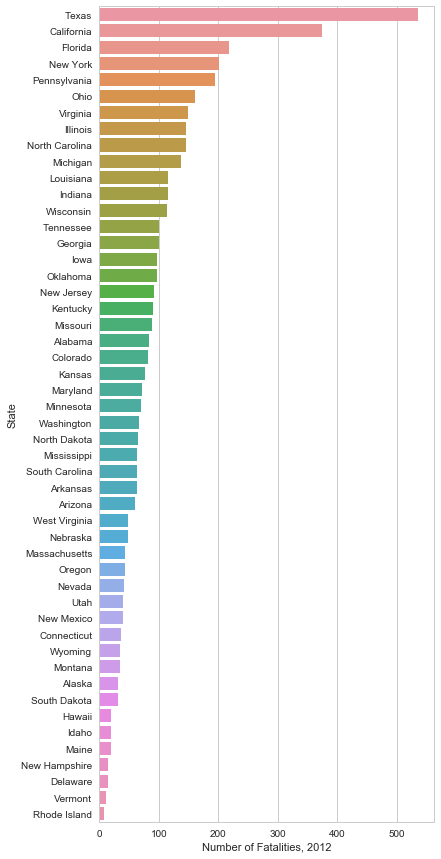

In [42]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

df_clean_sorted = df_clean.sort_values(by='Number of Fatalities, 2012', ascending=False)

sns.barplot(x="Number of Fatalities, 2012", y="State", data=df_clean_sorted)

In [71]:
df_clean.sort_values(by='Number of Fatalities, 2012', ascending=False)[:5]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
48,Texas,536.0,4.8,35.0,203200.000000,2.70000,2187.0,10.0,98.0,136.0,Federal
49,California,375.0,2.3,6.0,345400.000000,3.50000,6422.0,1.0,216.0,179.0,State
11,Florida,218.0,2.7,15.0,64178.571429,3.62093,1821.0,25.0,60.0,238.0,Federal
21,New York,202.0,2.4,8.0,146300.000000,2.50000,2016.0,17.0,105.0,184.0,Federal
19,Pennsylvania,194.0,3.4,22.0,155300.000000,3.90000,1916.0,22.0,57.0,125.0,Federal


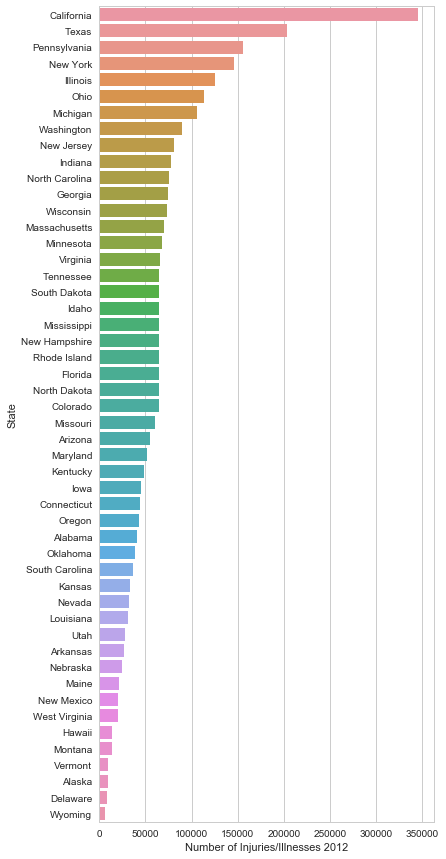

In [43]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

df_clean_sorted = df_clean.sort_values(by='Number of Injuries/Illnesses 2012', ascending=False)

sns.barplot(x="Number of Injuries/Illnesses 2012", y="State", data=df_clean_sorted)

In [72]:
df_clean.sort_values(by='Number of Injuries/Illnesses 2012', ascending=False)[:5]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
49,California,375.0,2.3,6.0,345400.0,3.5,6422.0,1.0,216.0,179.0,State
48,Texas,536.0,4.8,35.0,203200.0,2.7,2187.0,10.0,98.0,136.0,Federal
19,Pennsylvania,194.0,3.4,22.0,155300.0,3.9,1916.0,22.0,57.0,125.0,Federal
21,New York,202.0,2.4,8.0,146300.0,2.5,2016.0,17.0,105.0,184.0,Federal
5,Illinois,146.0,2.5,10.0,124900.0,3.2,1876.0,23.0,74.0,137.0,Federal


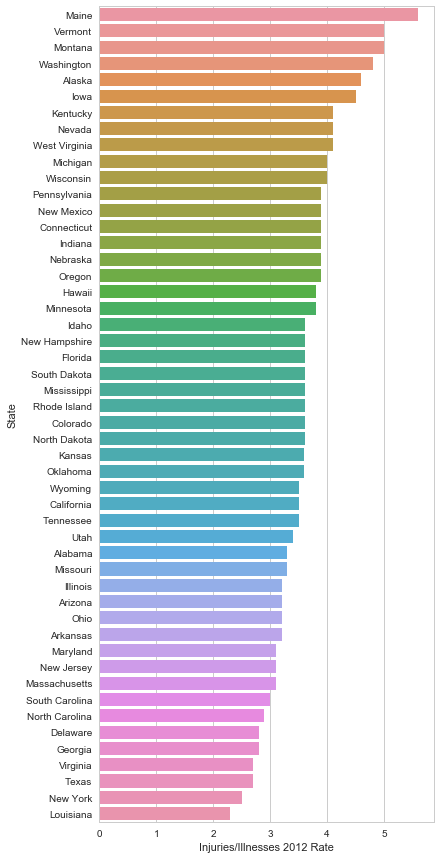

In [44]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

df_clean_sorted = df_clean.sort_values(by='Injuries/Illnesses 2012 Rate', ascending=False)

sns.barplot(x="Injuries/Illnesses 2012 Rate", y="State", data=df_clean_sorted)

In [73]:
df_clean.sort_values(by='Injuries/Illnesses 2012 Rate', ascending=False)[:5]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
23,Maine,19.0,3.2,20.0,21200.0,5.6,2083.0,14.0,8.0,80.0,Federal
25,Vermont,11.0,3.5,25.0,9900.0,5.0,1008.0,36.0,9.0,68.0,State
24,Montana,34.0,7.3,47.0,13300.0,5.0,1983.0,18.0,7.0,135.0,Federal
39,Washington,67.0,2.2,4.0,89300.0,4.8,791.0,42.0,111.0,50.0,State
45,Alaska,31.0,8.9,48.0,9700.0,4.6,889.0,41.0,11.0,58.0,State


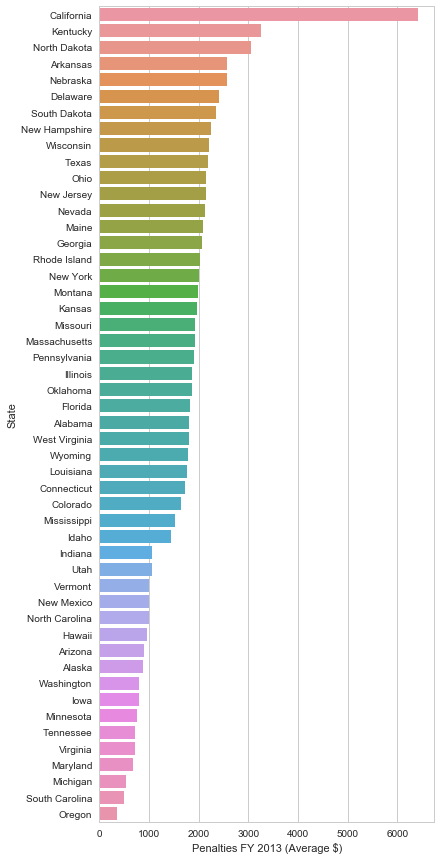

In [45]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

df_clean_sorted = df_clean.sort_values(by='Penalties FY 2013 (Average $)', ascending=False)

sns.barplot(x="Penalties FY 2013 (Average $)", y="State", data=df_clean_sorted)

In [74]:
df_clean.sort_values(by='Penalties FY 2013 (Average $)', ascending=False)[:5]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
49,California,375.0,2.3,6.0,345400.000000,3.50000,6422.0,1.0,216.0,179.0,State
28,Kentucky,91.0,4.9,37.0,48900.000000,4.10000,3254.0,2.0,39.0,124.0,State
47,North Dakota,65.0,17.7,50.0,64178.571429,3.62093,3045.0,3.0,8.0,111.0,Federal
26,Arkansas,63.0,5.4,39.0,26600.000000,3.20000,2569.0,4.0,9.0,237.0,Federal
6,Nebraska,48.0,5.2,38.0,24300.000000,3.90000,2565.0,5.0,9.0,128.0,Federal


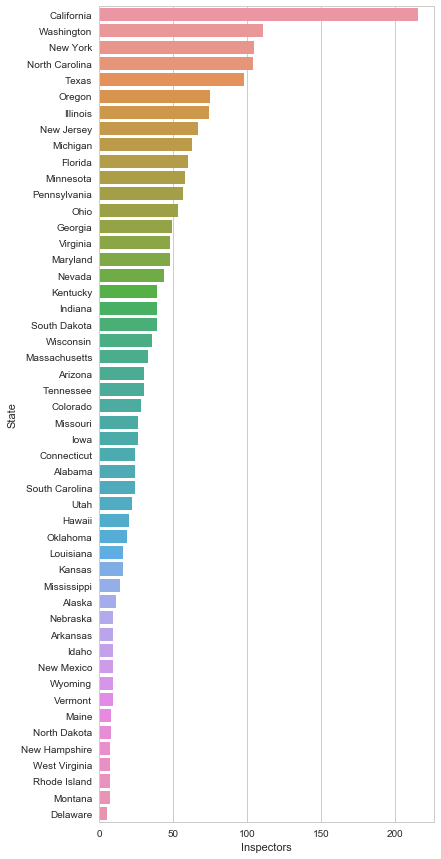

In [46]:

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

df_clean_sorted = df_clean.sort_values(by='Inspectors', ascending=False)

sns.barplot(x="Inspectors", y="State", data=df_clean_sorted)

In [75]:
df_clean.sort_values(by='Inspectors', ascending=False)[:5]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
49,California,375.0,2.3,6.0,345400.0,3.5,6422.0,1.0,216.0,179.0,State
39,Washington,67.0,2.2,4.0,89300.0,4.8,791.0,42.0,111.0,50.0,State
21,New York,202.0,2.4,8.0,146300.0,2.5,2016.0,17.0,105.0,184.0,Federal
16,North Carolina,146.0,3.5,25.0,75900.0,2.9,996.0,38.0,104.0,60.0,State
48,Texas,536.0,4.8,35.0,203200.0,2.7,2187.0,10.0,98.0,136.0,Federal


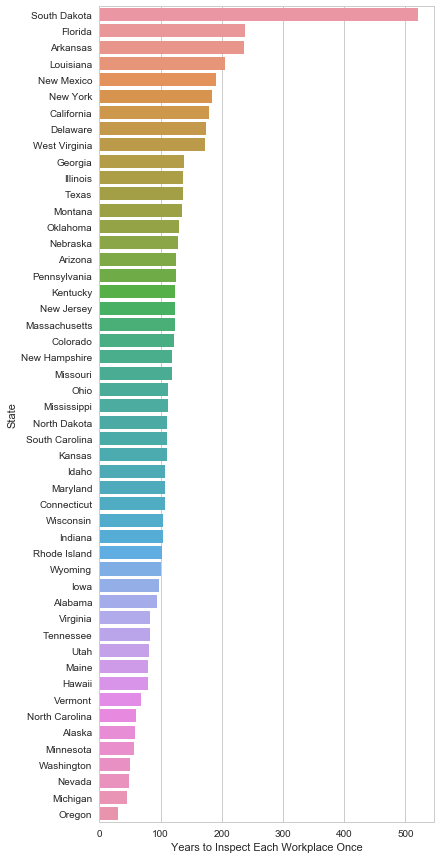

In [47]:

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

df_clean_sorted = df_clean.sort_values(by='Years to Inspect Each Workplace Once', ascending=False)

sns.barplot(x="Years to Inspect Each Workplace Once", y="State", data=df_clean_sorted)

In [76]:
df_clean.sort_values(by='Years to Inspect Each Workplace Once', ascending=False)[:5]

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
20,South Dakota,31.0,6.7,45.0,64178.571429,3.62093,2346.0,7.0,38.979592,521.0,Federal
11,Florida,218.0,2.7,15.0,64178.571429,3.62093,1821.0,25.0,60.000000,238.0,Federal
26,Arkansas,63.0,5.4,39.0,26600.000000,3.20000,2569.0,4.0,9.000000,237.0,Federal
42,Louisiana,116.0,6.4,43.0,30600.000000,2.30000,1765.0,29.0,16.000000,206.0,Federal
18,New Mexico,39.0,4.8,35.0,19900.000000,3.90000,998.0,37.0,9.000000,191.0,State


In [48]:
df_clean[df_clean['State or Federal Program'] == 'State']

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
0,South Carolina,63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State
3,Tennessee,101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State
8,Hawaii,20.0,3.4,22.0,13700.0,3.8,964.0,39.0,20.0,79.0,State
9,Iowa,97.0,6.6,44.0,45600.0,4.5,790.0,43.0,26.0,98.0,State
10,Arizona,60.0,2.3,6.0,54400.0,3.2,891.0,40.0,30.0,126.0,State
12,Virginia,149.0,3.8,30.0,66200.0,2.7,726.0,46.0,48.0,82.0,State
14,Michigan,137.0,3.4,22.0,105500.0,4.0,542.0,48.0,63.0,45.0,State
15,Indiana,115.0,4.2,33.0,77900.0,3.9,1054.0,34.0,39.0,104.0,State
16,North Carolina,146.0,3.5,25.0,75900.0,2.9,996.0,38.0,104.0,60.0,State
18,New Mexico,39.0,4.8,35.0,19900.0,3.9,998.0,37.0,9.0,191.0,State


In [49]:
df_clean[df_clean['State or Federal Program'] == 'Federal']

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
1,West Virginia,49.0,6.9,46.0,19800.000000,4.10000,1798.0,27.0,7.000000,173.0,Federal
2,Massachusetts,44.0,1.4,1.0,69700.000000,3.10000,1929.0,21.0,33.000000,123.0,Federal
4,Oklahoma,97.0,6.1,42.0,39000.000000,3.60000,1872.0,24.0,19.000000,131.0,Federal
5,Illinois,146.0,2.5,10.0,124900.000000,3.20000,1876.0,23.0,74.000000,137.0,Federal
6,Nebraska,48.0,5.2,38.0,24300.000000,3.90000,2565.0,5.0,9.000000,128.0,Federal
7,Delaware,14.0,3.1,18.0,7900.000000,2.80000,2406.0,6.0,5.000000,175.0,Federal
11,Florida,218.0,2.7,15.0,64178.571429,3.62093,1821.0,25.0,60.000000,238.0,Federal
13,Missouri,88.0,3.3,21.0,60300.000000,3.30000,1931.0,20.0,26.000000,118.0,Federal
17,New Hampshire,14.0,2.2,4.0,64178.571429,3.62093,2243.0,8.0,7.000000,119.0,Federal
19,Pennsylvania,194.0,3.4,22.0,155300.000000,3.90000,1916.0,22.0,57.000000,125.0,Federal
